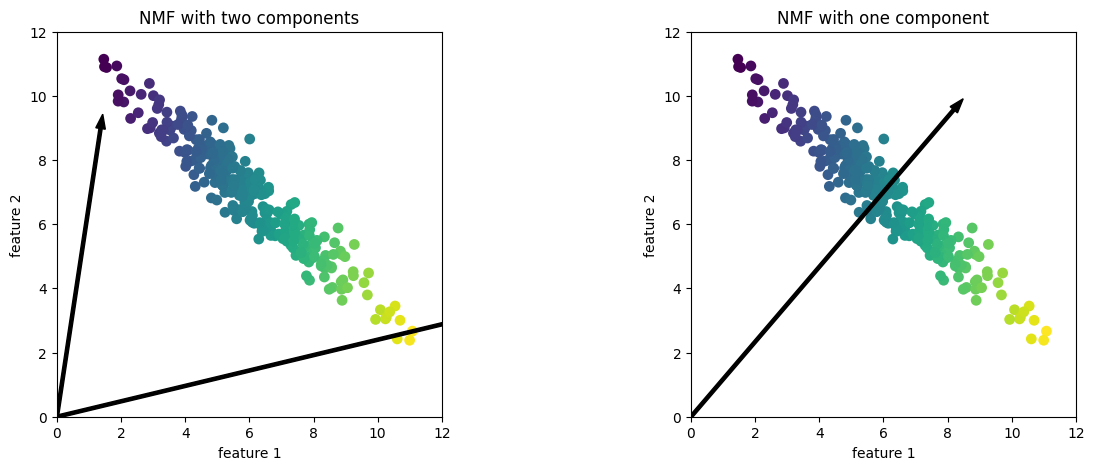

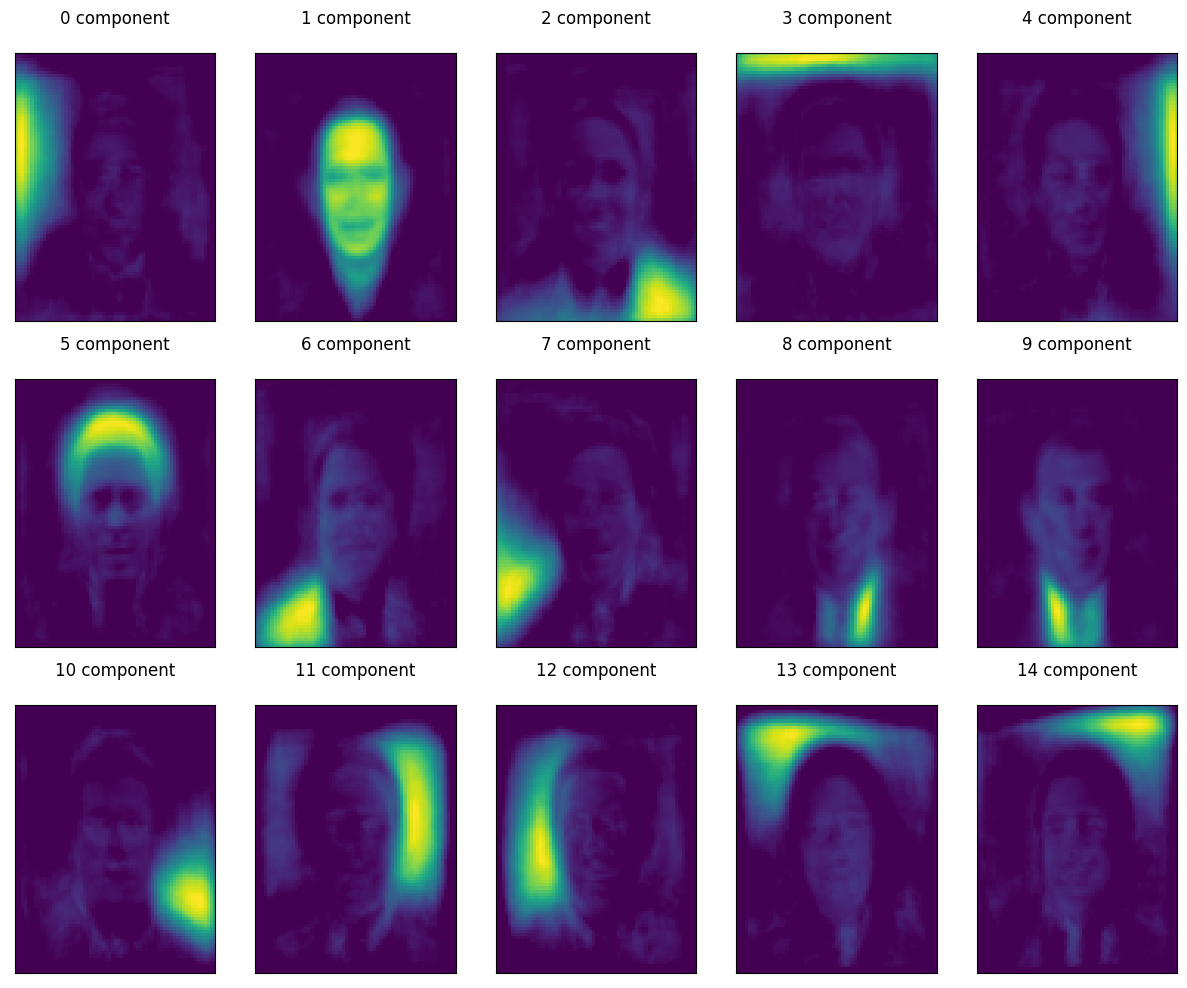

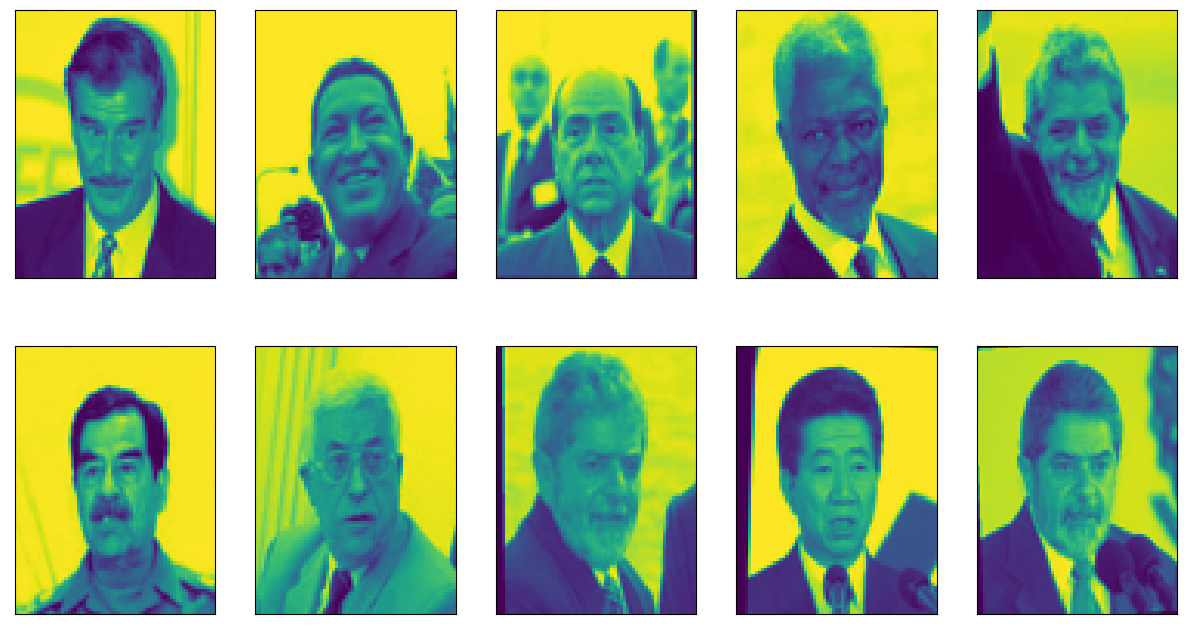

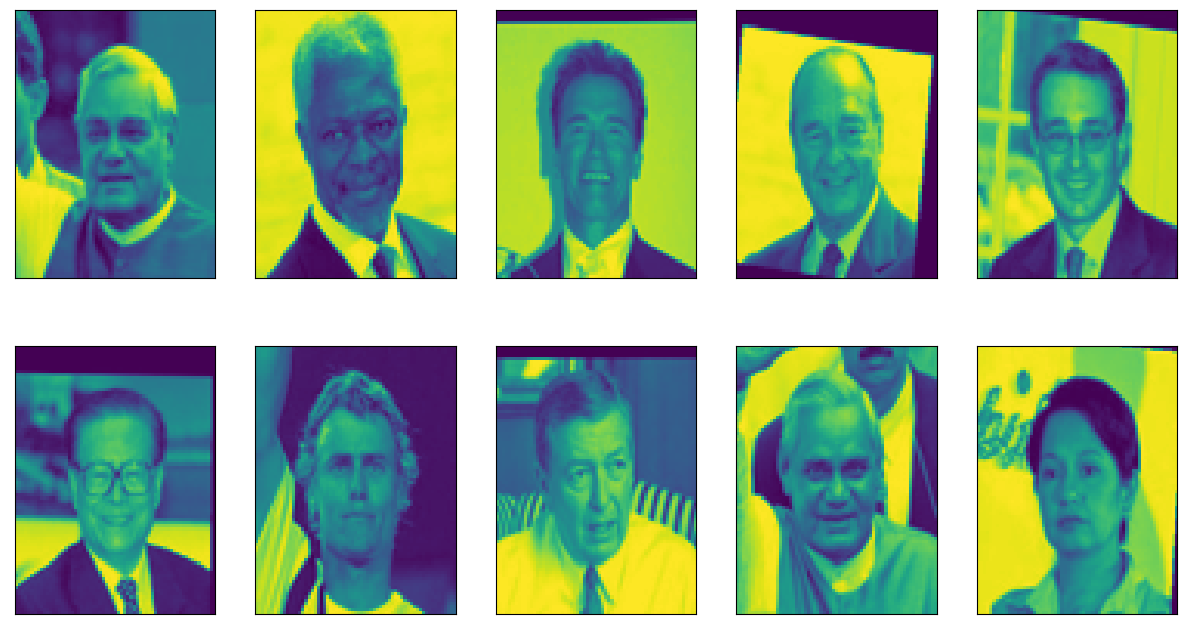

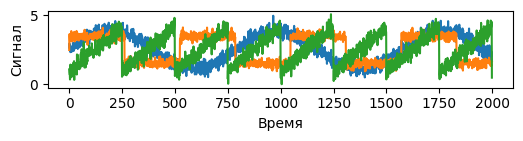

[[0.5488135  0.54488318 0.43758721 0.38344152 0.56804456 0.0871293
  0.77815675 0.79915856 0.11827443 0.94466892 0.26455561 0.56843395
  0.61209572 0.6818203  0.6976312  0.67063787 0.31542835 0.43860151
  0.20887676 0.2532916  0.15896958 0.13818295 0.82099323 0.09609841
  0.97676109 0.03918779 0.2961402  0.41426299 0.56660145 0.09394051
  0.31856895 0.7163272  0.58651293 0.00469548 0.73519402 0.57615733
  0.22308163 0.84640867 0.81379782 0.58127287 0.72525428 0.6439902
  0.0191932  0.29007761 0.13547406 0.59087276 0.65210327 0.36756187
  0.80619399 0.91948261 0.1494483  0.61555956 0.80731896 0.069167
  0.7220556  0.85580334 0.72999056 0.05433799 0.7936977  0.92808129
  0.16469416 0.23789282 0.5356328  0.311945   0.18619301 0.49045881
  0.05802916 0.69634349 0.02467873 0.45369684 0.99033895 0.26332238
  0.32001715 0.83104846 0.27354203 0.95279166 0.94737059 0.21331198
  0.20747008 0.46357542 0.86385561 0.13206811 0.56542131 0.48805628
  0.76532525 0.08342244 0.96193638 0.10029394 0.6699

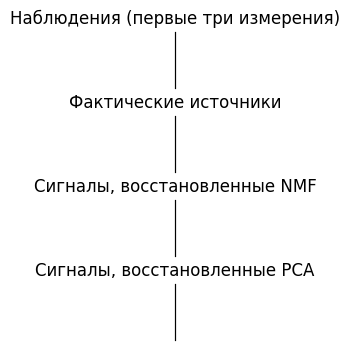

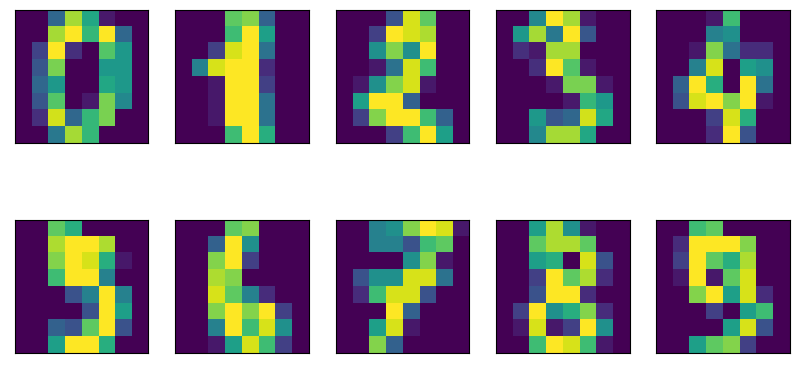

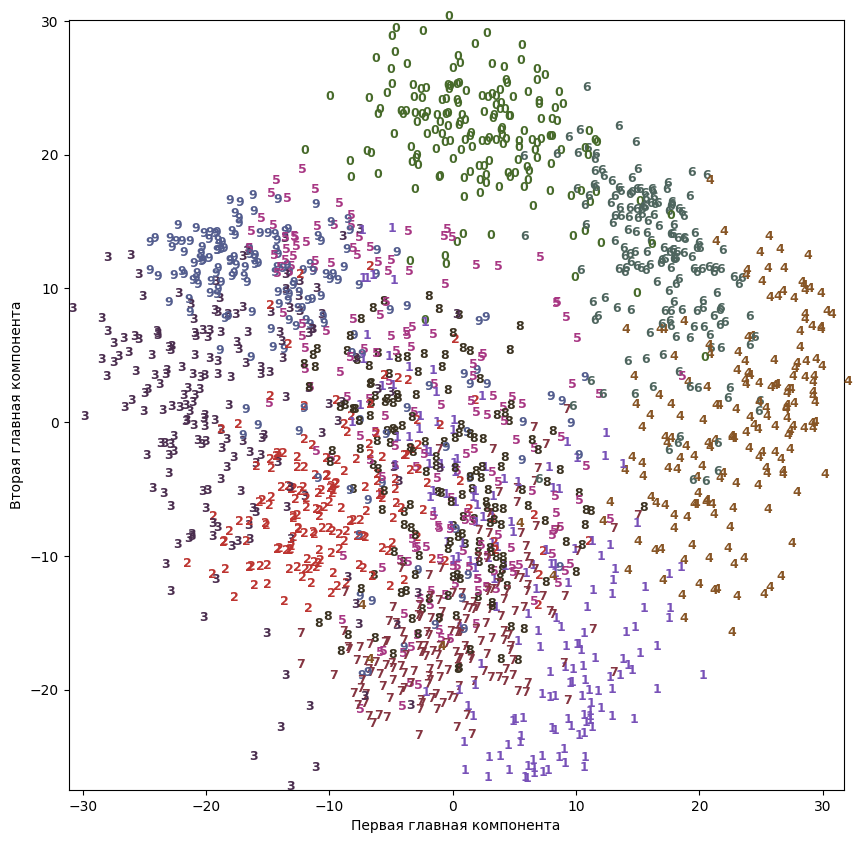

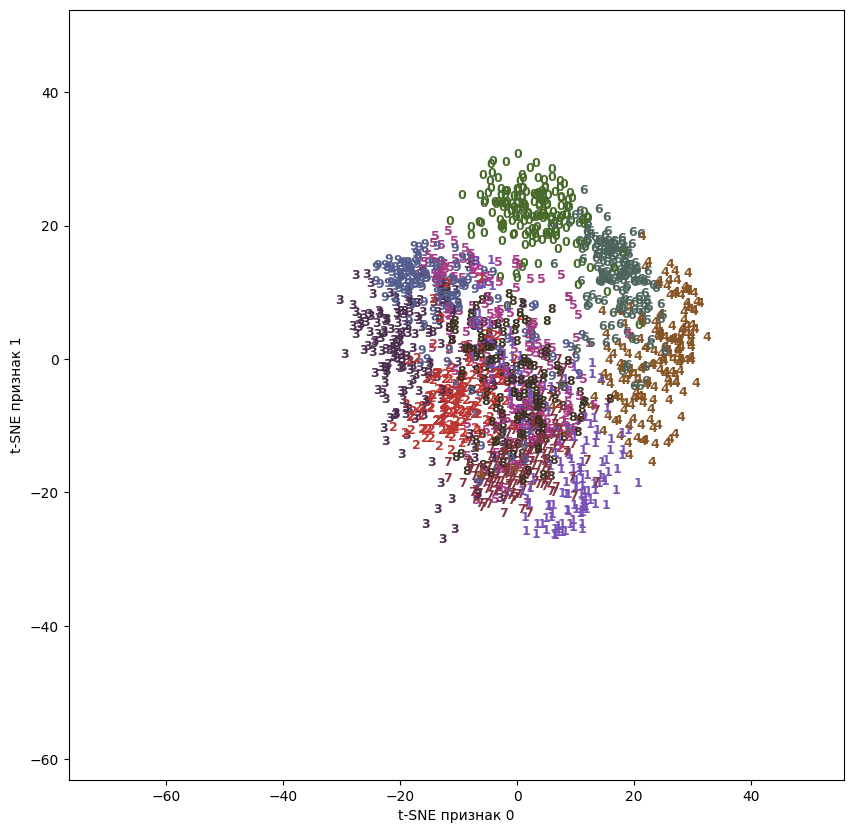

In [1]:
import warnings

import mglearn
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.decomposition import NMF
from sklearn.datasets import fetch_lfw_people
from mglearn.datasets import make_signals
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits
from sklearn.manifold import TSNE


def plot_nmf_illustration_show():
    mglearn.plots.plot_nmf_illustration()
    plt.show()


def NMF_show():
    people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)

    mask = np.zeros(people.target.shape, dtype=np.bool)
    for target in np.unique(people.target):
        mask[np.where(people.target == target)[0][:50]] = 1

    X_people = people.data[mask]
    y_people = people.target[mask]
    X_people /= 255

    X_train, X_test, y_train, y_test = train_test_split(X_people, y_people, stratify=y_people, random_state=0)

    nmf = NMF(n_components=15, random_state=0).fit(X_train, y_train)
    X_train_nmf = nmf.transform(X_train)

    image_shape = people.images[0].shape
    fig, axes = plt.subplots(3, 5, figsize=(15, 12), subplot_kw={'xticks': (), 'yticks': ()})
    for i, (component, ax) in enumerate(zip(nmf.components_, axes.ravel())):
        ax.imshow(component.reshape(image_shape))
        ax.set_title(f'{i} component\n')
    plt.show()

    compn = 3
    inds = np.argsort(X_train_nmf[:, compn])[::-1]
    fig, axes = plt.subplots(2, 5, figsize=(15, 8), subplot_kw={'xticks': (), 'yticks': ()})
    for i, (ind, ax) in enumerate(zip(inds, axes.ravel())):
        ax.imshow(X_train[ind].reshape(image_shape))
    plt.show()

    compn = 7
    inds = np.argsort(X_train_nmf[:, compn])[::-1]
    fig, axes = plt.subplots(2, 5, figsize=(15, 8), subplot_kw={'xticks': (), 'yticks': ()})
    for i, (ind, ax) in enumerate(zip(inds, axes.ravel())):
        ax.imshow(X_train[ind].reshape(image_shape))
    plt.show()


def make_signals_show():
    S = make_signals()

    plt.figure(figsize=(6, 1))
    plt.plot(S, '-')
    plt.xlabel('Время')
    plt.ylabel('Сигнал')
    plt.show()

    A = np.random.RandomState(0).uniform(size=(100, 3))
    X = np.dot(S, A.T)
    print(A.T)
    print(f'Форма измерений: {X.shape}')

    nmf = NMF(n_components=3, random_state=42)
    S_ = nmf.fit_transform(X)

    print(f'Форма восстановленного сигнала: {S_.shape}\n')
    pca = PCA(n_components=3)
    H = pca.fit_transform(X)

    models = [X, S, S_, H]
    names = ['Наблюдения (первые три измерения)',
             'Фактические источники',
             'Сигналы, восстановленные NMF',
             'Сигналы, восстановленные PCA']

    fig, axes = plt.subplots(4, figsize=(0, 4), gridspec_kw={'hspace': 0.5},
                             subplot_kw={'xticks': (), 'yticks': ()})

    for model, name, ax in (zip(models, names, axes)):
        ax.set_title(name)
        ax.plot(model[:, :3], '-')
    plt.show()


def load_digits_show():
    digits = load_digits()
    fig, axes = plt.subplots(2, 5, figsize=(10, 5), subplot_kw={'xticks': (), 'yticks': ()})
    for ax, img in zip(axes.ravel(), digits.images):
        ax.imshow(img)
    plt.show()

    pca = PCA(n_components=2).fit(digits.data)

    digits_pca = pca.transform(digits.data)
    colors = ['#476A2A', '#7851B8', '#BD3430', '#4A2D4E',
              '#875525', '#A83683', '#4E655E', '#853541',
              '#3A3120', '#535D8E']

    plt.figure(figsize=(10, 10))
    plt.xlim(digits_pca[:, 0].min(), digits_pca[:, 0].max())
    plt.ylim(digits_pca[:, 1].min(), digits_pca[:, 1].max())

    for i in range(len(digits.data)):
        plt.text(digits_pca[i, 0], digits_pca[i, 1],
                 str(digits.target[i]),
                 color=colors[digits.target[i]],
                 fontdict={'weight': 'bold', 'size': 9})
    plt.xlabel('Первая главная компонента')
    plt.ylabel('Вторая главная компонента')
    plt.show()

    tsne = TSNE(random_state=42)
    digits_tsne = tsne.fit_transform(digits.data)

    plt.figure(figsize=(10, 10))
    plt.xlim(digits_tsne[:, 0].min(), digits_tsne[:, 0].max() + 1)
    plt.ylim(digits_tsne[:, 1].min(), digits_tsne[:, 1].max() + 1)
    for i in range(len(digits.data)):
        plt.text(digits_pca[i, 0], digits_pca[i, 1],
                 str(digits.target[i]),
                 color=colors[digits.target[i]],
                 fontdict={'weight': 'bold', 'size': 9})
    plt.xlabel('t-SNE признак 0')
    plt.ylabel('t-SNE признак 1')
    plt.show()


def main():
    warnings.filterwarnings('ignore')

    plot_nmf_illustration_show()
    NMF_show()
    make_signals_show()
    load_digits_show()
    pass


main()